<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 31, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

### Presentado por: Juan Sebastian Cruz D

In [75]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt


from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [99]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [100]:
db = data[['review_body','product_category']]
db

,review_body,product_category
0,"Buen. Buena calidad, y buena presentación.",jewelry
1,"Un producto a perfecto, para salir de casa con...",video_games
2,No funciona con Nintendo Switch. No hay forma ...,video_games
3,"Recomendado, los utilizo para pc y no me dan n...",video_games
4,El cable funciona bien podria ser un poco mas ...,video_games
...,...,...
995,En la foto parece que la cadena sea más gruesa...,jewelry
996,"Bien por su precio, la cadena demasiado fina.",jewelry
997,Muy bien!! Ahora tengo organizados los pendien...,jewelry
998,"Las tapas para los joystics no están nada mal,...",video_games


# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [102]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(db, test_size=0.2, random_state=42)

print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de test tiene {test.shape[0]} registros")

El conjunto de datos de entrenamiento tiene 800 registros
El conjunto de datos de test tiene 200 registros


###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [103]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado) 

In [104]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [105]:
#Trayendo la Support vector Machine
from sklearn.svm import LinearSVC

#Inicializando
svm = LinearSVC(class_weight='balanced')

#Entrenando
svm.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [106]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import precision_score, recall_score
# Hacemos las predicciones para los datos de prueba (test)
y_pred_svm = svm.predict(X_test)

In [107]:
print(f"SVM exactitud: {accuracy_score(y_test, y_pred_svm):>23.2f}")



SVM exactitud:                    0.84


###  `[BONUS: 3 pts]` Matriz de confusión

In [108]:
#Resultados
confusion_matrix(y_test, y_pred_svm)

array([[83, 14],
       [18, 85]], dtype=int64)

###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

In [109]:
#Resultados

nuevo = ['el cable funciona', 'fotos cadenas']
nuevo_trans = tfidf_vect.transform(nuevo)
nuevo_trans.toarray()

svm.predict(nuevo_trans)

array(['video_games', 'jewelry'], dtype=object)

In [36]:
#Explicación del modelo 

vocab = {value:key for key, value in tfidf_vect.vocabulary_.items()}
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(),sorted(svm.coef_[0]))]

[('pulsera', -1.63),
 ('foto', -1.48),
 ('calidad', -1.42),
 ('gracias', -1.4),
 ('bonitos', -1.37),
 ('bonita', -1.27),
 ('cadena', -1.22),
 ('plata', -1.21),
 ('pendientes', -1.19),
 ('cierre', -1.07),
 ('pequeño', -1.03),
 ('bonito', -1.03),
 ('bonitas', -1.0),
 ('colgante', -0.92),
 ('grande', -0.91),
 ('presentación', -0.89),
 ('pesados', -0.89),
 ('fina', -0.87),
 ('collar', -0.87),
 ('muchísimo', -0.86),
 ('mujer', -0.85),
 ('demasiado', -0.84),
 ('corresponde', -0.83),
 ('llegaron', -0.79),
 ('diseño', -0.79),
 ('enseguida', -0.77),
 ('chino', -0.76),
 ('material', -0.76),
 ('alergia', -0.74),
 ('grandes', -0.73),
 ('semana', -0.71),
 ('preciosa', -0.71),
 ('acabado', -0.71),
 ('pueden', -0.7),
 ('niñas', -0.69),
 ('encanta', -0.68),
 ('igual', -0.67),
 ('gustan', -0.67),
 ('horrible', -0.66),
 ('feo', -0.66),
 ('ok', -0.66),
 ('llegué', -0.66),
 ('aun', -0.66),
 ('publicidad', -0.65),
 ('estan', -0.65),
 ('recibido', -0.65),
 ('piedras', -0.65),
 ('pequeños', -0.65),
 ('dorado

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [87]:
db_a = data[['review_body','product_category']]
db_a

,review_body,product_category
0,"Buen. Buena calidad, y buena presentación.",jewelry
1,"Un producto a perfecto, para salir de casa con...",video_games
2,No funciona con Nintendo Switch. No hay forma ...,video_games
3,"Recomendado, los utilizo para pc y no me dan n...",video_games
4,El cable funciona bien podria ser un poco mas ...,video_games
...,...,...
995,En la foto parece que la cadena sea más gruesa...,jewelry
996,"Bien por su precio, la cadena demasiado fina.",jewelry
997,Muy bien!! Ahora tengo organizados los pendien...,jewelry
998,"Las tapas para los joystics no están nada mal,...",video_games


In [88]:
import re

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
 
def pre_procesado(texto):

     texto = texto.lower()

     texto = re.sub(r"[\W\d_]+", " ", texto)

     return texto
 
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

tfidf = tfidf_vect.fit_transform(db_a.review_body.values)

tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

In [89]:
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

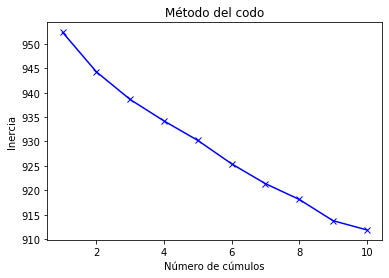

In [90]:
ks = []

k_inertia = []


for k in range(1,11):

     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)


plt.xlabel('Número de cúmulos')

plt.ylabel("Inercia")

plt.title("Método del codo")

plt.plot(ks, k_inertia, 'bx-')

### K escogido = 2

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [91]:
k = 2

model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(tfidf_matrix.values)

In [92]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[2335, 1228, 1995, ..., 2357,  792, 3011],
       [2921, 1196, 2400, ..., 3125, 2284, 2240]], dtype=int64)

In [93]:
tfidf_vect.get_feature_names()

['abajo',
 'abalorio',
 'abalorios',
 'abaratar',
 'abate',
 'abierta',
 'abierto',
 'ablar',
 'aboné',
 'abre',
 'abren',
 'abres',
 'abriese',
 'abril',
 'abrir',
 'abrirlo',
 'abrirlos',
 'abro',
 'abrocharla',
 'absolutamente',
 'absoluto',
 'absurda',
 'abuela',
 'abulta',
 'abultados',
 'aburres',
 'aburrido',
 'aburrir',
 'acaba',
 'acabado',
 'acabados',
 'acabar',
 'acabe',
 'acabo',
 'accesorio',
 'accesorios',
 'accionaba',
 'acción',
 'acelerar',
 'aceptable',
 'acero',
 'acerté',
 'acierto',
 'aclara',
 'aclarando',
 'acogida',
 'acolchado',
 'acompaña',
 'acompañadas',
 'aconsejaría',
 'aconsejo',
 'acopla',
 'acoplados',
 'acorde',
 'acostumbrarme',
 'activación',
 'activadas',
 'activado',
 'activarlo',
 'actor',
 'actual',
 'actualiza',
 'actualizados',
 'actualizaron',
 'actualizaré',
 'actualmente',
 'actuar',
 'acuerdo',
 'adapta',
 'adaptable',
 'adaptador',
 'adaptan',
 'adaptar',
 'adapten',
 'adecuada',
 'adecuado',
 'adecuados',
 'adelantado',
 'adelante',
 'ad

In [94]:
db_a['cluster'] = model.labels_ 
clust_cnt = db_a['cluster'].value_counts()
clust_cnt_pct = db_a['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")

for i in range(k): 
    print(f"Cluster #{i}")
    print(f"{clust_cnt[i]} textos ({clust_cnt_pct[i]:.2%} de los datos)")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :15]:
        print(f"{terms[idx]}", end=" ")
    print("\n\n")
    print(f"Textos Representativos")
    for texto in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]]['product_category'].values:
        print(f"* {texto}")
    print("\n")

CLUSTERS:

Cluster #0
483 textos (48.30% de los datos)
TERMINOS:  muy en la de un calidad para se el es pero los bien son con 


Textos Representativos
* jewelry
* jewelry
* jewelry


Cluster #1
517 textos (51.70% de los datos)
TERMINOS:  que el no de la me es lo en se pero ha por un para 


Textos Representativos
* jewelry
* video_games
* video_games




C:\Users\Sebastian Cruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
clusters = {0:'Jewelry',

             1:'Video Games'}
 
db_a['cluster_name'] = db_a['cluster'].apply(lambda val: clusters[val])

db_a['texto_peq'] = db_a['product_category'].apply(lambda texto: texto[:100])
 
db_a

C:\Users\Sebastian Cruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sebastian Cruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,review_body,product_category,cluster,cluster_name,texto_peq
0,"Buen. Buena calidad, y buena presentación.",jewelry,0,Jewelry,jewelry
1,"Un producto a perfecto, para salir de casa con...",video_games,0,Jewelry,video_games
2,No funciona con Nintendo Switch. No hay forma ...,video_games,0,Jewelry,video_games
3,"Recomendado, los utilizo para pc y no me dan n...",video_games,0,Jewelry,video_games
4,El cable funciona bien podria ser un poco mas ...,video_games,0,Jewelry,video_games
...,...,...,...,...,...
995,En la foto parece que la cadena sea más gruesa...,jewelry,1,Video Games,jewelry
996,"Bien por su precio, la cadena demasiado fina.",jewelry,0,Jewelry,jewelry
997,Muy bien!! Ahora tengo organizados los pendien...,jewelry,0,Jewelry,jewelry
998,"Las tapas para los joystics no están nada mal,...",video_games,1,Video Games,video_games


###  `[BONUS: 3 pts]` Visualización usando PCA

In [96]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import plotly.graph_objs as go

from plotly.offline import iplot

In [97]:
pca = PCA(n_components=2)
 
result = pca.fit_transform(tfidf_matrix)

result = pd.DataFrame(result)

result.columns = ['X', 'Y']

result['cluster'] = db_a.cluster.values

result['texto'] = db_a.texto_peq.values
 
trace = go.Scatter(x=result['X'].values,

                    y=result['Y'].values,

                    text=result['texto'].values,

                    mode='markers',

                    marker=dict(color=result['cluster'].values)) 
 
layout = go.Layout(title="PCA")
 
fig = go.Figure(data=trace, layout=layout)

iplot(fig)

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [22]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
# transformar con tfidf usado para clasificación
# transformar con tfidf usado para agrupación

# resultado para clasificación
# resultado para agrupación

['video_games' 'jewelry']
[1 2]


In [110]:
#Resultados Clasificacion 

test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_trans = tfidf_vect.transform(test)
nuevo_trans.toarray()

svm.predict(nuevo_trans)

array(['video_games', 'jewelry'], dtype=object)

In [112]:
#Resultados Agrupación 

test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_trans = tfidf_vect.get_feature_names(test)
nuevo_trans.toarray()

svm.predict(nuevo_trans)

TypeError: get_feature_names() takes 1 positional argument but 2 were given

### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor? 
R=\ Al primer modelo le fue mucho mejor y se obtuvieron mejores resultados. 

- ¿Cuál modelo se demoró más en entrenar? 
R=\ El modelo de K-means con 2.
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
R=\ N/A
- ¿Alguna otra observación?
R=\ N/A